In [ ]:
%cd "/content/drive/MyDrive/DEPI_TASKS/"

/content/drive/MyDrive/DEPI_TASKS


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# The mian aim of this project is to predict whether it will rain or not in Australia. Rain prediciton depends upon a number of factors like temperature, humidity, wind speed, wind direction etc.

In [ ]:
#libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/DEPI_TASKS/logistic_regression/weatherAUS.csv')

This dataset contains about 10 years of daily weather observations from numerous Australian weather stations.

RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No?
This column is Yes if the rain for that day was 1mm or more.

In [ ]:
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
#shape of dataset
dataset.shape

(145460, 23)

In [ ]:
#display column names
dataset.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
#display columns types
dataset.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

## We can see that the data type of Date variable is object. I will parse the date currently coded as object into datetime format.**bold text**

In [ ]:
# parse the dates, currently coded as strings, into datetime format

dataset['Date'] = pd.to_datetime(dataset['Date'])

In [ ]:
#display year from date
dataset['year']=dataset['Date'].dt.year
dataset['year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: year, dtype: int32

In [ ]:
#display month from date
dataset['Month']=dataset['Date'].dt.month
dataset['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int32

In [ ]:
#display day from date
dataset['Day']=dataset['Date'].dt.day
dataset['Day'].head()

0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int32

In [ ]:
# drop the original Date variable

dataset.drop('Date', axis=1, inplace = True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-null

# **categorical columns**

In [ ]:
# find categorical variables
categorical=[]
for i in dataset.columns:
  if dataset[i].dtypes=="O":
    categorical.append(i)
print('The categorical variables are :', categorical)
print("length of categorical variables is : ",len(categorical))


The categorical variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
length of categorical variables is :  6


In [ ]:
dataset[categorical].isnull().sum()

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

<Axes: >

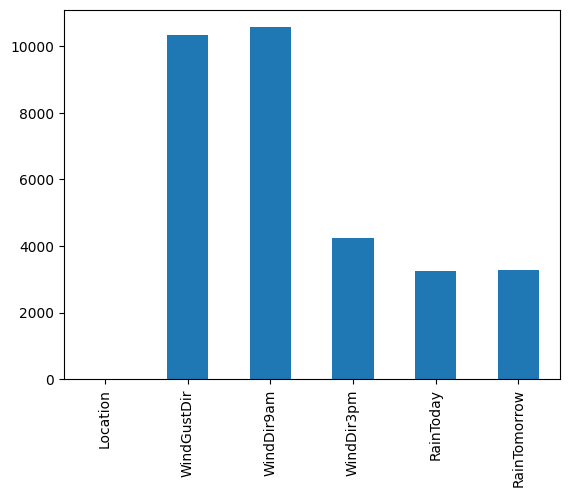

In [ ]:
dataset[categorical].isnull().sum(axis=0).plot.bar()

In [ ]:
# impute missing categorical variables with most frequent value
for column in categorical:
    mode_value = dataset[column].mode()[0]
    dataset[column].fillna(mode_value, inplace=True)
print("\nDataFrame after imputing missing values with mode:")
print(dataset[categorical])


DataFrame after imputing missing values with mode:
       Location WindGustDir WindDir9am WindDir3pm RainToday RainTomorrow
0        Albury           W          W        WNW        No           No
1        Albury         WNW        NNW        WSW        No           No
2        Albury         WSW          W        WSW        No           No
3        Albury          NE         SE          E        No           No
4        Albury           W        ENE         NW        No           No
...         ...         ...        ...        ...       ...          ...
145455    Uluru           E         SE        ENE        No           No
145456    Uluru         NNW         SE          N        No           No
145457    Uluru           N         SE        WNW        No           No
145458    Uluru          SE        SSE          N        No           No
145459    Uluru           W        ESE        ESE        No           No

[145460 rows x 6 columns]


In [ ]:
dataset[categorical].isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

# numerical **columns**

In [ ]:
# find numerical variables
numerical=[]
for i in dataset.columns:
  if dataset[i].dtypes!="O":
    numerical.append(i)
print('The numerical variables are :', numerical)
print("length of numerical variables is : ",len(numerical))


The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'year', 'Month', 'Day']
length of numerical variables is :  19


In [ ]:
dataset[numerical].isna().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
year                 0
Month                0
Day                  0
dtype: int64

<Axes: >

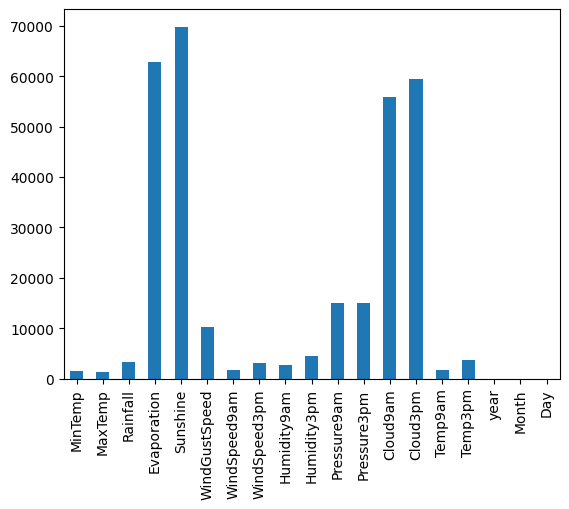

In [ ]:
dataset[numerical].isna().sum().plot.bar()

In [ ]:
for col in numerical:
    median_value = dataset[col].median()
    dataset[col].fillna(median_value, inplace=True)

print(dataset[numerical])

        MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0          13.4     22.9       0.6          4.8       8.4           44.0   
1           7.4     25.1       0.0          4.8       8.4           44.0   
2          12.9     25.7       0.0          4.8       8.4           46.0   
3           9.2     28.0       0.0          4.8       8.4           24.0   
4          17.5     32.3       1.0          4.8       8.4           41.0   
...         ...      ...       ...          ...       ...            ...   
145455      2.8     23.4       0.0          4.8       8.4           31.0   
145456      3.6     25.3       0.0          4.8       8.4           22.0   
145457      5.4     26.9       0.0          4.8       8.4           37.0   
145458      7.8     27.0       0.0          4.8       8.4           28.0   
145459     14.9     22.6       0.0          4.8       8.4           39.0   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0         

In [ ]:
dataset[numerical].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
year             0
Month            0
Day              0
dtype: int64

In [ ]:
dataset.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,Month,Day
0,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,WNW,...,1007.1,8.0,5.0,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,WSW,...,1007.8,5.0,5.0,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,WSW,...,1008.7,5.0,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,E,...,1012.8,5.0,5.0,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


# Encode categorical **variables**

In [ ]:
dataset[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No


In [ ]:
for col in categorical:
    print(col,"----->", dataset[col].unique())

Location -----> ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
WindGustDir -----> ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 'E' 'SSW']
WindDir9am -----> ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'N' 'SSW' 'WSW' 'ESE' 'E' 'NW'
 'WNW' 'NNE']
WindDir3pm -----> ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' 'NE']
RainToday -----> ['No' 'Yes']
RainTomorrow -----> ['No' 'Yes']


In [ ]:
dataset_encoded=dataset.replace({
    'RainToday': {'Yes': 1, 'No': 0},
    'RainTomorrow': {'Yes': 1, 'No': 0}
})
dataset_encoded.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,Month,Day
0,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,WNW,...,1007.1,8.0,5.0,16.9,21.8,0,0,2008,12,1
1,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,WSW,...,1007.8,5.0,5.0,17.2,24.3,0,0,2008,12,2
2,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,WSW,...,1008.7,5.0,2.0,21.0,23.2,0,0,2008,12,3
3,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,E,...,1012.8,5.0,5.0,18.1,26.5,0,0,2008,12,4
4,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12,5


In [ ]:
#pip install --upgrade pandas

In [ ]:
dataset_encoded_final = pd.get_dummies(dataset_encoded,dtype=int)

dataset_encoded_final.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,4.8,8.4,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,4.8,8.4,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,4.8,8.4,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,4.8,8.4,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,4.8,8.4,41.0,7.0,20.0,82.0,33.0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
dataset_encoded_final.dtypes

MinTemp           float64
MaxTemp           float64
Rainfall          float64
Evaporation       float64
Sunshine          float64
                   ...   
WindDir3pm_SSW      int64
WindDir3pm_SW       int64
WindDir3pm_W        int64
WindDir3pm_WNW      int64
WindDir3pm_WSW      int64
Length: 118, dtype: object

In [ ]:
# checking for duplicate rows
print("duplicate rows = " ,dataset_encoded_final.duplicated().sum())

duplicate rows =  0


In [ ]:
# view summary statistics in numerical  variables

print(round(dataset_encoded_final[numerical].describe()),2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  145460.0  145460.0  145460.0     145460.0  145460.0       145460.0   
mean       12.0      23.0       2.0          5.0       8.0           40.0   
std         6.0       7.0       8.0          3.0       3.0           13.0   
min        -8.0      -5.0       0.0          0.0       0.0            6.0   
25%         8.0      18.0       0.0          4.0       8.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          5.0       9.0           46.0   
max        34.0      48.0     371.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      145460.0      145460.0     145460.0     145460.0     145460.0   
mean           14.0          19.0         69.0         52.0       1018.0   
std             9.0           9.0         19.0         20.0          7.0   
mi

Text(0, 0.5, 'WindSpeed3pm')

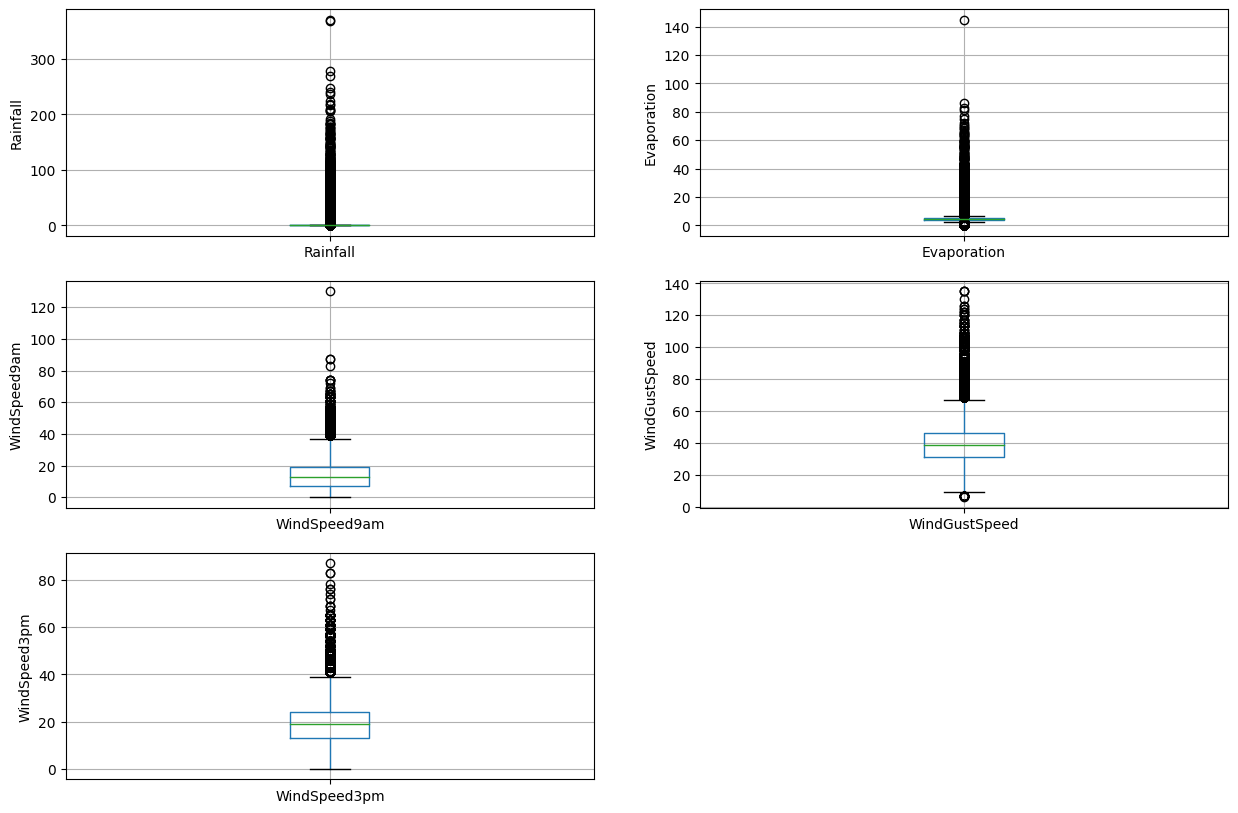

In [ ]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(3, 2, 1)
fig = dataset_encoded_final.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(3, 2, 2)
fig = dataset_encoded_final.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(3, 2, 3)
fig = dataset_encoded_final.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(3, 2, 4)
fig = dataset_encoded_final.boxplot(column='WindGustSpeed')
fig.set_title('')
fig.set_ylabel('WindGustSpeed')


plt.subplot(3, 2, 5)
fig = dataset_encoded_final.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

In [ ]:
# Calculate Z-scores
z_scores = np.abs(stats.zscore(dataset_encoded_final))

# Define a threshold
threshold = 3

# Identify outliers
outliers = (z_scores > threshold)

# Handle outliers by replacing them with the median of the column
dataset_encoded_finall= dataset_encoded_final.mask(outliers, dataset_encoded_final.median(), axis=1)

print("DataFrame after handling outliers using Z-score method:")
dataset_encoded_finall.describe()

DataFrame after handling outliers using Z-score method:


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,...,145460.0,145460.0,145460.0,145460.000000,145460.0,145460.0,145460.0,145460.0,145460.0,145460.0
mean,12.193908,23.245056,1.447234,4.960437,7.989889,39.392369,13.721291,18.461818,69.146411,51.553396,...,0.0,0.0,0.0,0.103575,0.0,0.0,0.0,0.0,0.0,0.0
std,6.360328,6.998576,3.849848,2.334650,2.757790,12.024982,8.275690,8.309097,18.466984,20.471345,...,0.0,0.0,0.0,0.304709,0.0,0.0,0.0,0.0,0.0,0.0
min,-6.900000,2.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,13.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,7.700000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,58.000000,37.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
75%,16.800000,28.200000,0.400000,5.000000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
max,31.200000,44.400000,27.400000,14.700000,14.500000,78.000000,39.000000,44.000000,100.000000,100.000000,...,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(round(dataset_encoded_finall[numerical].describe()),2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  145460.0  145460.0  145460.0     145460.0  145460.0       145460.0   
mean       12.0      23.0       1.0          5.0       8.0           39.0   
std         6.0       7.0       4.0          2.0       3.0           12.0   
min        -7.0       2.0       0.0          0.0       0.0            6.0   
25%         8.0      18.0       0.0          4.0       8.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       0.0          5.0       9.0           46.0   
max        31.0      44.0      27.0         15.0      14.0           78.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      145460.0      145460.0     145460.0     145460.0     145460.0   
mean           14.0          18.0         69.0         52.0       1018.0   
std             8.0           8.0         18.0         20.0          7.0   
mi

# Checking for imbalanced output#


In [ ]:
dataset_encoded_finall['RainTomorrow'].value_counts()

RainTomorrow
0    113583
1     31877
Name: count, dtype: int64

<Axes: xlabel='RainTomorrow'>

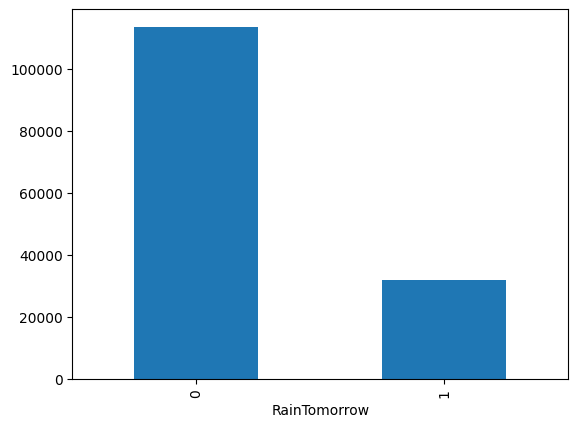

In [ ]:
dataset_encoded_finall['RainTomorrow'].value_counts().plot.bar()

# Splitting dataset into input and output

In [ ]:
data_input = dataset_encoded_finall.drop(columns=['RainTomorrow'])
data_output = dataset_encoded_finall['RainTomorrow']

In [ ]:
data_input.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,4.8,8.4,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,0,0,0
1,7.4,25.1,0.0,4.8,8.4,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,0,0
2,12.9,25.7,0.0,4.8,8.4,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,0,0
3,9.2,28.0,0.0,4.8,8.4,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,4.8,8.4,41.0,7.0,20.0,82.0,33.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_output.head()

0    0
1    0
2    0
3    0
4    0
Name: RainTomorrow, dtype: int64

# Splitting data into train, validation, and test

In [ ]:
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(
    data_input, data_output, test_size=0.20, random_state=0
)

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.20, random_state=0
)

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('-------------------------')
print('X_val:', X_val.shape)
print('y_val:', y_val.shape)
print('-------------------------')
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (93094, 117)
y_train: (93094,)
-------------------------
X_val: (23274, 117)
y_val: (23274,)
-------------------------
X_test: (29092, 117)
y_test: (29092,)


# Solving the problem of imbalanced data

In [ ]:
y_train.value_counts()

RainTomorrow
0    72641
1    20453
Name: count, dtype: int64

Undersamping:

Using undersampling to reduce the samples of class 0 so that Class 1 : Class 0 = 0.5

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=0.5, random_state=0)

X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

y_train_rus.value_counts()

RainTomorrow
0    40906
1    20453
Name: count, dtype: int64

Oversamping:

Using oversampling to increase the samples of class 1 so that Class 1 : Class 0 = 1

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy=1.0, random_state=0)

X_train_balanced, y_train_balanced = ros.fit_resample(X_train_rus, y_train_rus)


y_train_balanced.value_counts()

RainTomorrow
0    40906
1    40906
Name: count, dtype: int64

<Axes: xlabel='RainTomorrow'>

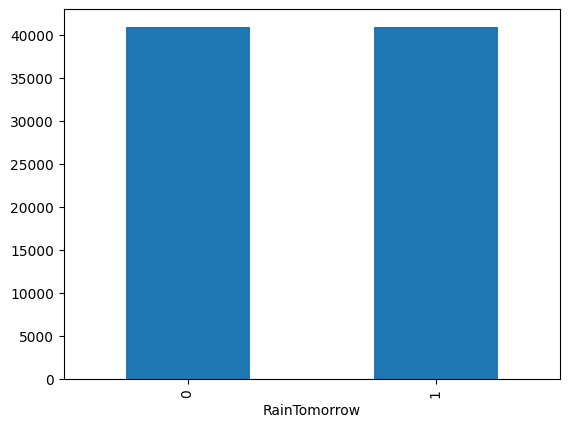

In [ ]:
y_train_balanced.value_counts().plot.bar()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_balanced)
X_train_scaled = scaler.transform(X_train_balanced)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print(X_train_scaled)

[[-0.50933995 -0.88864952 -0.45661127 ...  0.          0.
   0.        ]
 [-1.09141452 -0.31519068 -0.45661127 ...  0.          0.
   0.        ]
 [ 0.38736951  0.588007   -0.45661127 ...  0.          0.
   0.        ]
 ...
 [-0.49360821 -1.17537895  1.39983531 ...  0.          0.
   0.        ]
 [-0.87117009 -1.17537895  3.42897459 ...  0.          0.
   0.        ]
 [-0.33629076 -1.49078131 -0.45661127 ...  0.          0.
   0.        ]]


# Helper function: Evaluate Classifier

In [ ]:
from sklearn.metrics import accuracy_score
'''
 Calculate and return training accuracy
 and validation accuracy of given classifier
 on given training and validation data
'''
def eval_classifier(clf,X_train_balanced, y_train_balanced, X_val, y_val):
 clf.fit(X_train_balanced, y_train_balanced)
 y_pred_train = clf.predict(X_train_balanced)
 y_pred_val = clf.predict(X_val)
 acc_train = accuracy_score(y_train_balanced, y_pred_train)
 acc_val = accuracy_score(y_val, y_pred_val)
 print(clf.__class__.__name__)
 print('acc train:', acc_train)
 print('acc val:', acc_val)
 print('----------------------------')
 return acc_train, acc_val

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


In [ ]:
tree_clf = DecisionTreeClassifier(random_state=0)
logistic_clf = LogisticRegression(solver='liblinear', random_state=0)
estimators = [
 ('tree', tree_clf),
 ('logistic', logistic_clf)
 ]

In [ ]:
results = {
 'model': [],
 'acc train': [],
 'acc val': []
}
for (name, clf) in estimators:
 acc_train, acc_val = eval_classifier(
 clf, X_train_scaled, y_train_balanced, X_val_scaled, y_val
 )
 results['model'].append(name)
 results['acc train'].append(acc_train)
 results['acc val'].append(acc_val)

DecisionTreeClassifier
acc train: 1.0
acc val: 0.7560797456389103
----------------------------
LogisticRegression
acc train: 0.7743485063315895
acc val: 0.7806565265962018
----------------------------


In [ ]:
from sklearn.ensemble import BaggingClassifier
bagging_clf = BaggingClassifier(
 LogisticRegression(random_state=1), n_estimators=150,
 max_samples=0.60, bootstrap=True, random_state=1, n_jobs=-1
)
acc_train_bag, acc_val_bag = eval_classifier(
 bagging_clf, X_train_scaled, y_train_balanced, X_val_scaled, y_val
)



BaggingClassifier
acc train: 0.7743240600400919
acc val: 0.7807854257970267
----------------------------


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=500, max_depth=13, random_state=0)
acc_train_rf, acc_val_rf = eval_classifier(
 rf_clf, X_train_scaled,y_train_balanced, X_val_scaled, y_val
)

RandomForestClassifier
acc train: 0.8690778858847112
acc val: 0.8016670963306695
----------------------------


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
ex_clf = ExtraTreesClassifier(n_estimators=750, max_depth=26, random_state=0)
acc_train_ex, acc_val_ex = eval_classifier(
 ex_clf, X_train_scaled, y_train_balanced, X_val_scaled, y_val
)

ExtraTreesClassifier
acc train: 0.9900259130689875
acc val: 0.8359542837501074
----------------------------


In [ ]:
final_results = {
 'model': [],
 'acc train': [],
 'acc val': []
}
final_results['model'] = results['model'] + ['bagging', 'random_forest', 'extra_trees']
final_results['acc train'] = results['acc train'] + [acc_train_bag, acc_train_rf, acc_train_ex]
final_results['acc val'] = results['acc val'] + [acc_val_bag, acc_val_rf, acc_val_ex]

In [ ]:
final_results_df = pd.DataFrame(final_results)
final_results_df.sort_values(by='acc val', ascending=False, ignore_index=True, inplace=True)
final_results_df

,model,acc train,acc val
0,extra_trees,0.990026,0.835954
1,random_forest,0.869078,0.801667
2,bagging,0.774287,0.780785
3,logistic,0.774349,0.780657
4,tree,1.000000,0.756080


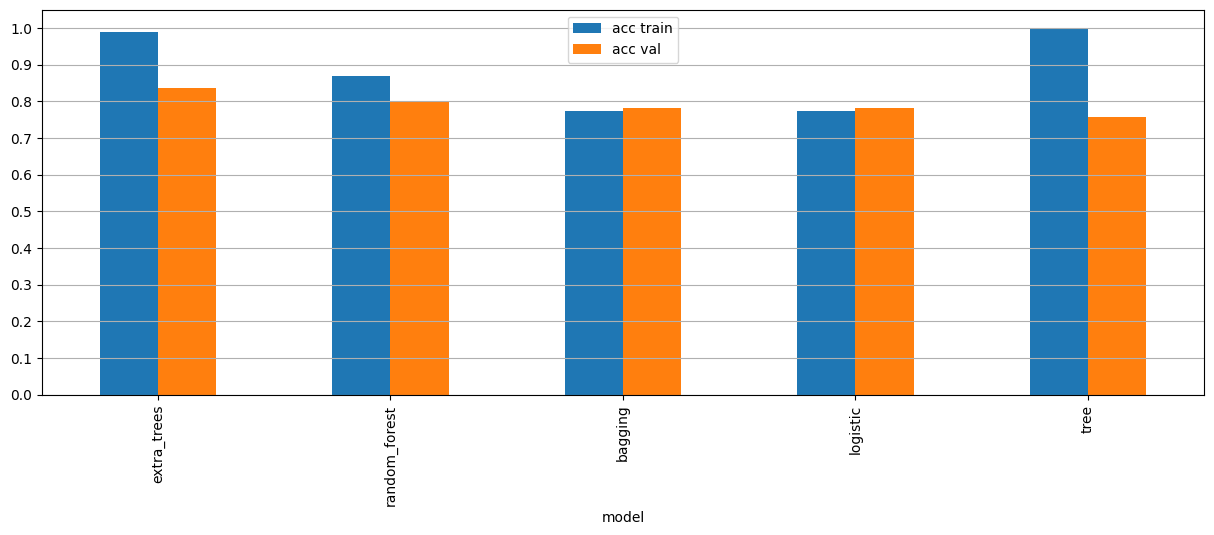

In [ ]:
%matplotlib inline
final_results_df.plot.bar(x='model', y=['acc train', 'acc val'], figsize=(15,5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid(axis='y')
plt.show()

In [ ]:
model_best=extra_trees=ExtraTreesClassifier()
#model_best=random_forest=RandomForestClassifier()

model_best.fit(X_train_scaled, y_train_balanced)

ExtraTreesClassifier()

In [ ]:
y_pred_test =model_best.predict(X_test_scaled)
print(accuracy_score(y_test, y_pred_test))

0.8447339474769696


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_test)

array([[20813,  1913],
       [ 2604,  3762]])